In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image

In [10]:
class BreastCancerClassifier:
    def __init__(self):
        # Initialize classifiers
        self.random_forest_classifier = RandomForestClassifier()
        
    def fit(self, df, X_train, y_train):
        self.fit_rule_based_classifier(df)
        self.random_forest_classifier.fit(X_train, y_train)
        pass

    def predict(self, X_test):
        y_pred = self.random_forest_classifier.predict(X_test)
        return y_pred
   
    def score(self, df, X_test, y_test):
        self.fit_rule_based_scorer(df)
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        print(f"Accuracy Random forest: {accuracy:.2f}%")
        self.custom_scorer(df,self.custom_classifier(df, y_pred, X_test), X_test)

        # Feature Importance
        feature_importances = pd.Series(self.random_forest_classifier.feature_importances_, index=X_test.columns).sort_values(ascending=False)
        feature_importances.plot(kind='bar', title='Feature Importances')
        

    def custom_classifier(self,df,y_predicted, X_test):
            
            # Extract the indices of X_test
            test_indices = X_test.index

            # Filter df using the indices of X_test and select all features
            rule_base_predictions = df.loc[test_indices, 'predicted_diagnosis']
        
            random_forest_predictions = y_predicted



            predictions_combined = []

            for pred_rule_based,pred_rf in zip(rule_base_predictions,random_forest_predictions):
                if pred_rf == 1:
                    predictions_combined.append(pred_rf)
                else:
                    predictions_combined.append(pred_rule_based)
            
            return predictions_combined


    def fit_rule_based_classifier(self, df):
        features = df[df.malignant == 0].drop(columns=["id", "malignant"])

       # Find the maximum value for each feature
        max_values = features.max()
        
        # Store the maximum value for each feature in a dictionary
        thresholds = max_values.to_dict()
        

        # Define a function to classify based on thresholds
        def classify(row):
            for feature, threshold in thresholds.items():
                if row[feature] > threshold:
                    return 1  # malignant
            return 0  # benign
        
        df["predicted_diagnosis"] = df.apply(classify, axis=1)

              

    def fit_rule_based_scorer(self, X_test):
        correct_predictions = (X_test['malignant'] == X_test['predicted_diagnosis']).sum()
        total_predictions = len(X_test)
        accuracy_percentage = (correct_predictions / total_predictions) * 100

        print(f"Accuracy Rule based: {accuracy_percentage:.2f}%")

    def custom_scorer(self, df, predicted, X_test):
        loop = X_test.index
        loopdf = df.loc[loop, 'malignant']
        correct_predictions = (loopdf == predicted).sum()
        total_predictions = len(X_test)
        accuracy_percentage = (correct_predictions / total_predictions) * 100

        print(f"Accuracy Rule based: {accuracy_percentage:.2f}%")      

   
        

Accuracy Rule based: 93.32%
Accuracy Random forest: 96.49%
Accuracy Rule based: 96.49%


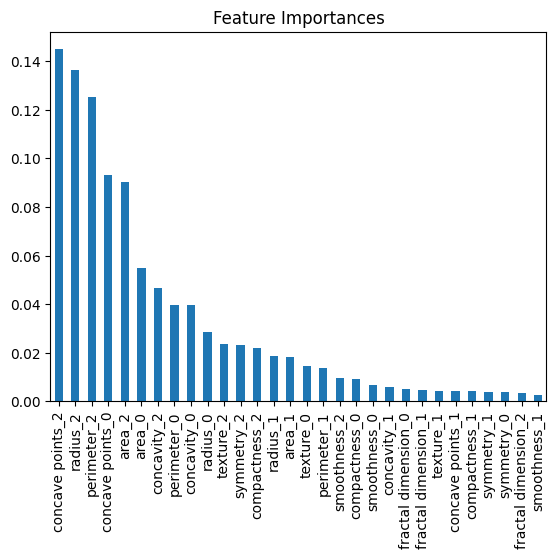

In [11]:
# Loading data
df = pd.read_pickle('dataset/wdbc.pkl')
X = df.drop(columns=["id", "malignant"])
y = df.malignant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


# Training and scoring
classifier = BreastCancerClassifier()
classifier.fit(df, X_train, y_train)
classifier.score(df, X_test, y_test)
plt.show()  # Display the plot